In [2]:
import numpy as np
import pandas as pd

from src.interpretability_component.data_preprocessor import *
from src.interpretability_component.utils import *
from src.interpretability_component.similarity_measures import *

In [3]:
# @formatter:off
%load_ext autoreload
%autoreload 2
# @formatter:on

## Data Preprocessing

In [4]:
vae_str = "../../../results/model/best_vae_2023-10-13_17-11-04"

In [5]:
data_preprocessor = Zheng(vae_str)

In [6]:
data_preprocessor.model.summary()

Model: "tcvae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  308056    
                                                                 
 decoder (Decoder)           multiple                  1343019   
                                                                 
Total params: 1651088 (6.30 MB)
Trainable params: 1651075 (6.30 MB)
Non-trainable params: 13 (52.00 Byte)
_________________________________________________________________


In [7]:
data_preprocessor.meta_data

,age,atrial_rate,beat,gender,q_offset,q_onset,qrs_count,qrs_duration,qt_corrected,qt_interval,r_axis,rhythm,t_axis,t_offset,ventricular_rate
0,82,68,2,0,5,223,12,76,158,134,60,1,62,162,68
1,60,54,7,1,7,212,9,102,144,166,17,0,11,167,54
2,30,80,28,1,28,227,27,114,208,22,55,6,221,110,168
3,52,43,1,1,255,210,7,90,110,178,244,0,2,171,43
4,67,55,2,1,7,222,9,82,197,218,74,0,73,203,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,42,71,2,0,14,225,11,90,167,134,78,1,70,164,71
252,64,58,2,0,253,211,9,84,150,158,55,0,56,162,58
253,65,64,2,1,3,219,10,80,150,138,73,1,34,160,64
254,45,63,2,0,7,219,10,88,139,130,46,1,62,156,63


In [8]:
data_preprocessor.z

<tf.Tensor: shape=(256, 12), dtype=float32, numpy=
array([[-2.1043308 ,  1.0365129 ,  0.3576377 , ..., -0.8751891 ,
        -0.68415856,  0.87666523],
       [-0.4456935 , -1.8402402 ,  1.6775923 , ...,  0.15146443,
        -1.3689117 ,  1.6320063 ],
       [-1.9109116 , -2.7198281 ,  1.5119715 , ..., 13.267751  ,
        -9.997176  ,  2.7457151 ],
       ...,
       [-2.0464709 ,  1.2282435 ,  0.8635309 , ..., -3.2757826 ,
         0.9320102 , -1.2720747 ],
       [-1.2113144 ,  1.5636792 ,  0.32999492, ...,  1.519185  ,
         0.52532434, -1.5520539 ],
       [-3.3495357 , -2.0931172 , -1.0679169 , ..., -0.15612051,
        -0.42959023, -1.3008298 ]], dtype=float32)>

### Export to csv for CardioKit

In [9]:
# export dataset and discrete features to .csv for CardioKit
directory = "../data/"
save_dataset_as_csv(data_preprocessor.data_str, 512,
                    directory=directory)

save_discrete_features_as_csv(discrete_features=data_preprocessor.get_discrete_features(),
                              features_names=data_preprocessor.meta_data.columns, data_str=data_preprocessor.data_str,
                              directory=directory)

saved zheng_data.csv
saved zheng_discrete_features.csv


## Correlation between Meta Data

Figure saved as results/00_correlation.pdf


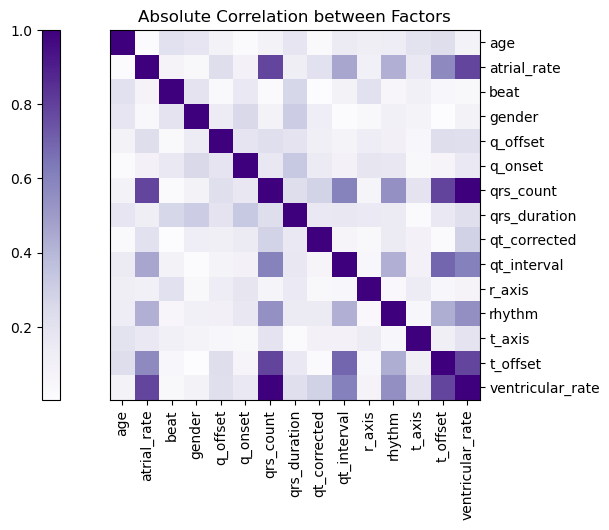

In [10]:
corr = data_preprocessor.meta_data.corr()
filename = "results/" + "00" + "_correlation"
visualize_corr(corr, True, filename)

## Mutual Information

In [11]:
meta_data = data_preprocessor.meta_data
z = data_preprocessor.z
discrete_features = data_preprocessor.discrete_features

In [12]:
sim_measure = SimilarityMeasure(data_preprocessor, mutual_information_regression)
scores = sim_measure.scores

C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [13]:
scores

array([[0.02347657, 0.        , 0.0759867 , 0.        , 0.        ,
        0.        , 0.04874578, 0.00488   , 0.        , 0.06010873,
        0.10914732, 0.01117315, 0.01150293, 0.0064746 , 0.06930087],
       [0.        , 0.01565911, 0.01221907, 0.        , 0.        ,
        0.        , 0.        , 0.02631836, 0.        , 0.00877282,
        0.        , 0.        , 0.        , 0.00797609, 0.        ],
       [0.02339256, 0.        , 0.11992948, 0.00746585, 0.00685988,
        0.        , 0.07831116, 0.06324739, 0.05881356, 0.        ,
        0.        , 0.06987403, 0.04911571, 0.00338224, 0.04648752],
       [0.05520352, 0.07095357, 0.05703952, 0.00193861, 0.        ,
        0.00211102, 0.07547822, 0.        , 0.06594237, 0.14443846,
        0.00912193, 0.06610535, 0.0283934 , 0.14811659, 0.10258651],
       [0.        , 0.        , 0.05448496, 0.02161548, 0.01202091,
        0.10785743, 0.01593093, 0.03512502, 0.00504331, 0.05391245,
        0.05512804, 0.13306102, 0.01069628, 

In [14]:
print(sim_measure.get_interpretable_dims())

{'age': 11, 'atrial_rate': 5, 'beat': 2, 'gender': 9, 'q_offset': 8, 'q_onset': 4, 'qrs_count': 5, 'qrs_duration': 2, 'qt_corrected': 5, 'qt_interval': 5, 'r_axis': 0, 'rhythm': 10, 't_axis': 5, 't_offset': 5, 'ventricular_rate': 5}


Figure saved as results/00_mi.pdf


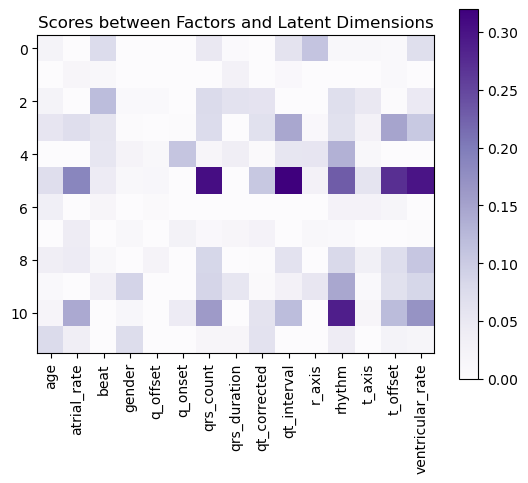

In [15]:
filename = "results/" + "00" + "_mi"
visualize_mi_matrix(scores, meta_data.columns, save_pdf=True, filename=filename)

## Mutual Information with Bins

In [16]:
num_bins = 12  # num_bins cannot be too high or else the computation takes forever (choose with rule of thumb "square root of n", scott, sturges, freedman-diaconis - good for outliers -,
sim_measure = SimilarityMeasure(data_preprocessor, mutual_information_bins, num_bins=num_bins)
scores = sim_measure.scores

C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

Figure saved as results/0_mi_discrete.pdf


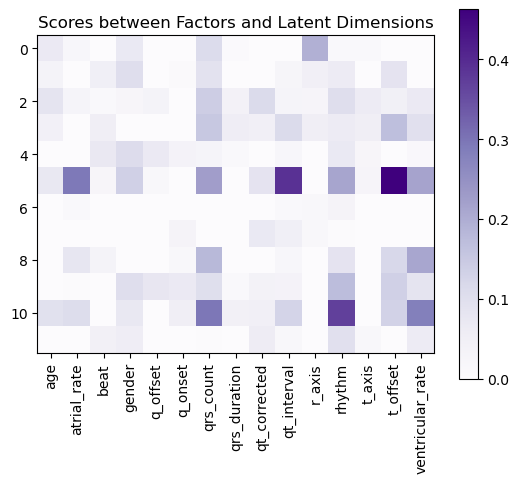

In [17]:
filename = "results/" + "0" + "_mi_discrete"
visualize_mi_matrix(scores, meta_data.columns, save_pdf=True, filename=filename)

## Pearson's correlation

In [18]:
sim_measure = SimilarityMeasure(data_preprocessor, pearson_correlation)
scores = sim_measure.scores

Figure saved as results/0_pearson_correlation.pdf


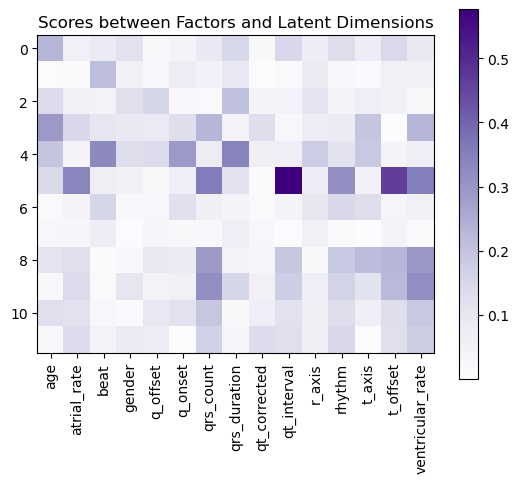

In [19]:

filename = "results/" + "0" + "_pearson_correlation"
visualize_mi_matrix(np.abs(scores), meta_data.columns, save_pdf=True, filename=filename)

## Wasserstein Distance ( W1 distance )

In [20]:
sim_measure = SimilarityMeasure(data_preprocessor, wasserstein_dist)
scores = sim_measure.scores

Figure saved as results/0_wasserstein.pdf


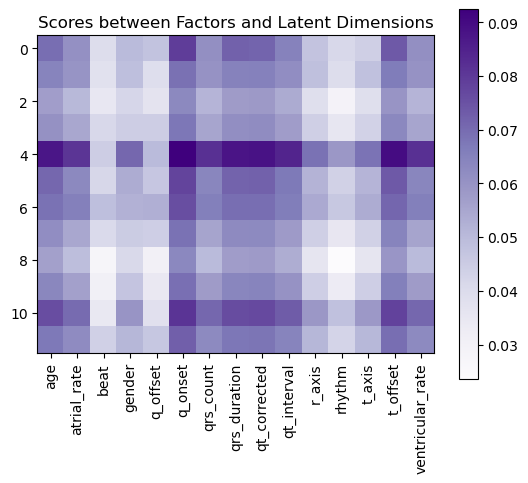

In [21]:

filename = "results/" + "0" + "_wasserstein"
visualize_mi_matrix(scores, meta_data.columns, save_pdf=True, filename=filename)

## KL Divergence

Values are infinity because the data has a lot of 0 values.
Possible solutions:
- add pseudocounts
- different base
- different method, another method to calculate kl divergence

In [22]:
sim_measure = SimilarityMeasure(data_preprocessor, kl_divergence_bins, num_bins=num_bins)
scores = sim_measure.scores

C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

Figure saved as results/0_kl.pdf


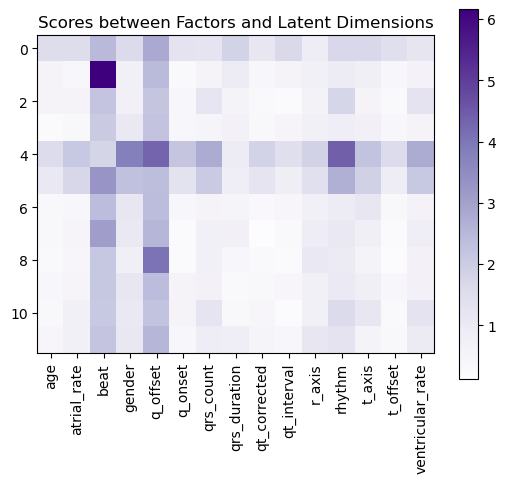

In [23]:
filename = "results/" + "0" + "_kl"
visualize_mi_matrix(scores, meta_data.columns, save_pdf=True, filename=filename)

## Jensen-Shannon divergence


In [24]:
sim_measure = SimilarityMeasure(data_preprocessor, jensen_shannon_divergence, num_bins=num_bins)
scores = sim_measure.scores

C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

Figure saved as results/0_js.pdf


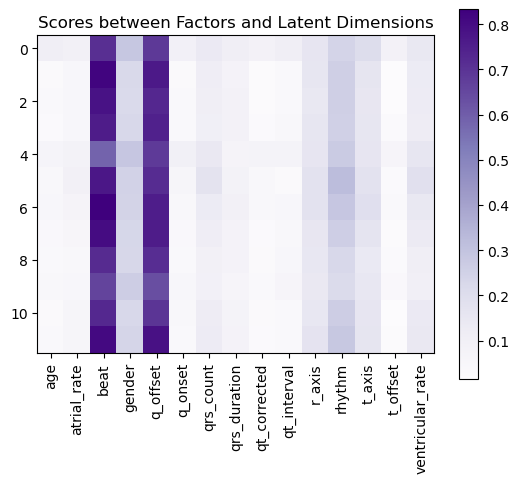

In [25]:
filename = "results/" + "0" + "_js"
visualize_mi_matrix(scores, meta_data.columns, save_pdf=True, filename=filename)

## Random Forest Regressor

In [26]:
sim_measure = SimilarityMeasure(data_preprocessor, random_forest_regressor)
scores = sim_measure.scores

Factor 0, best depth: 8, best feature: 0.3
Factor 1, best depth: 8, best feature: 0.3
Factor 2, best depth: 128, best feature: 0.3
Factor 3, best depth: 128, best feature: 0.3
Factor 4, best depth: 128, best feature: 0.3
Factor 5, best depth: 16, best feature: 0.3
Factor 6, best depth: 128, best feature: 0.3
Factor 7, best depth: 128, best feature: 0.3
Factor 8, best depth: 128, best feature: 0.6
Factor 9, best depth: 128, best feature: 0.6
Factor 10, best depth: 8, best feature: 0.3
Factor 11, best depth: 128, best feature: 0.3
Factor 12, best depth: 16, best feature: 0.3
Factor 13, best depth: 8, best feature: 0.6
Factor 14, best depth: 8, best feature: 0.3


Figure saved as results/0_random_forest_regressor.pdf


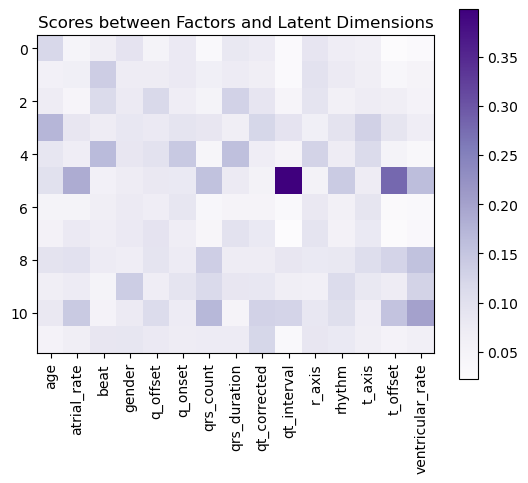

In [27]:
filename = "results/" + "0" + "_random_forest_regressor"
visualize_mi_matrix(scores, meta_data.columns, save_pdf=True, filename=filename)

## Lasso Regressor

In [28]:
sim_measure = SimilarityMeasure(data_preprocessor, lasso_regressor)
scores = sim_measure.scores

Factor 0, best alpha: 1
Factor 1, best alpha: 1
Factor 2, best alpha: 1
Factor 3, best alpha: 0.4
Factor 4, best alpha: 1
Factor 5, best alpha: 1
Factor 6, best alpha: 0.4
Factor 7, best alpha: 1
Factor 8, best alpha: 1
Factor 9, best alpha: 1
Factor 10, best alpha: 1
Factor 11, best alpha: 0.4
Factor 12, best alpha: 1
Factor 13, best alpha: 1
Factor 14, best alpha: 1


Figure saved as results/0_lasso_regressor.pdf


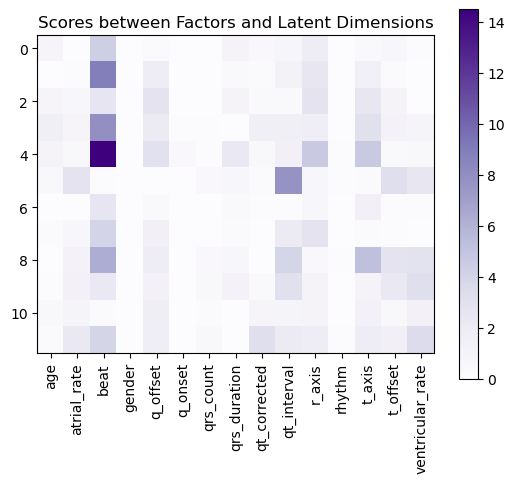

In [29]:
filename = "results/" + "0" + "_lasso_regressor"
visualize_mi_matrix(scores, meta_data.columns, save_pdf=True, filename=filename)

Lasso Regressor is very confident with its beat prediction in dimension 4. When removing the feature beat, the matrix looks very similar to the one of the Random Forest Regressor

## Linear Regressor

In [30]:
sim_measure = SimilarityMeasure(data_preprocessor, linear_regressor)
scores = sim_measure.scores

Figure saved as results/0_linear_regressor.pdf


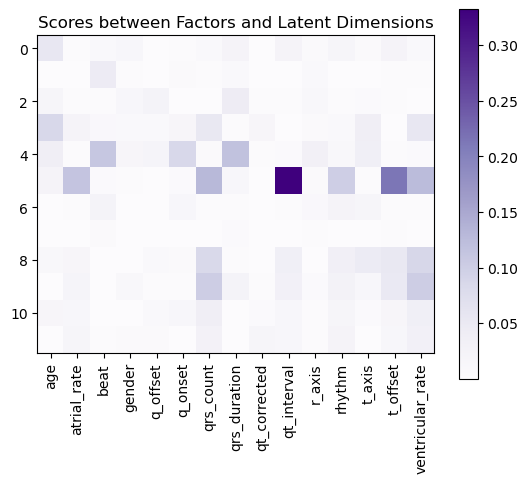

In [31]:
filename = "results/" + "0" + "_linear_regressor"
visualize_mi_matrix(scores, meta_data.columns, save_pdf=True, filename=filename)

## Logistic Regressor


In [32]:
sim_measure = SimilarityMeasure(data_preprocessor, logistic_regressor)
scores = sim_measure.scores

C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Sonja Krafft\.conda\envs\VECG\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

Figure saved as results/0_logistic_regressor.pdf


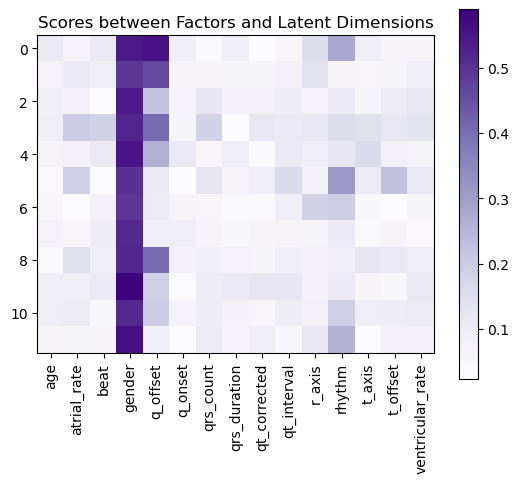

In [33]:
filename = "results/" + "0" + "_logistic_regressor"
visualize_mi_matrix(scores, meta_data.columns, save_pdf=True, filename=filename)

In [34]:
sim_measure.extra

0.6156431467349913